## Objective

To identify different segments in the existing customers, based on their spending patterns as well as past interaction with the bank, using clustering algorithms, and provide recommendations to the bank on how to better market to and service these customers.

## Data Description

The data provided is of various customers of a bank and their financial attributes like credit limit, the total number of credit cards the customer has, and different channels through which customers have contacted the bank for any queries (including visiting the bank, online, and through a call center).

## Data Dictionary

* Sl_No: Primary key of the records
* Customer Key: Customer identification number
* Average Credit Limit: Average credit limit of each customer for all credit cards
* Total credit cards: Total number of credit cards possessed by the customer
* Total visits bank: Total number of visits that the customer made (yearly) personally to the bank
* Total visits online: Total number of visits or online logins made by the customer (yearly)
* Total calls made: Total number of calls made by the customer to the bank or its customer service department (yearly)

## Installing necessary packages and Libraries

In [526]:
!pip install yellowbrick

In [527]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd
# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# to scale the data using z-score
from sklearn.preprocessing import StandardScaler

# to compute distances
from scipy.spatial.distance import cdist, pdist

# to perform k-means clustering and compute silhouette scores
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# to visualize the elbow curve and silhouette scores

from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

# to perform hierarchical clustering, compute cophenetic correlation, and create dendrograms
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet

# to suppress warnings
import warnings
warnings.filterwarnings("ignore")

## Loading the data set

In [529]:
data=pd.read_csv("Credit Card Customer Data.csv")

In [530]:
data.head()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3


In [531]:
data.tail()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
655,656,51108,99000,10,1,10,0
656,657,60732,84000,10,1,13,2
657,658,53834,145000,8,1,9,1
658,659,80655,172000,10,1,15,0
659,660,80150,167000,9,0,12,2


In [532]:
data.shape

(660, 7)

* Data set contains 600 rows and 7 columns

In [534]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Sl_No                660 non-null    int64
 1   Customer Key         660 non-null    int64
 2   Avg_Credit_Limit     660 non-null    int64
 3   Total_Credit_Cards   660 non-null    int64
 4   Total_visits_bank    660 non-null    int64
 5   Total_visits_online  660 non-null    int64
 6   Total_calls_made     660 non-null    int64
dtypes: int64(7)
memory usage: 36.2 KB


* There are no null values all are integers 

In [536]:
data.describe()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
count,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000
mean,330.500000,55141.443939,34574.242424,4.706061,2.403030,2.606061,3.583333
std,190.669872,25627.772200,37625.487804,2.167835,1.631813,2.935724,2.865317
min,1.000000,11265.000000,3000.000000,1.000000,0.000000,0.000000,0.000000
25%,165.750000,33825.250000,10000.000000,3.000000,1.000000,1.000000,1.000000
50%,330.500000,53874.500000,18000.000000,5.000000,2.000000,2.000000,3.000000
75%,495.250000,77202.500000,48000.000000,6.000000,4.000000,4.000000,5.000000
max,660.000000,99843.000000,200000.000000,10.000000,5.000000,15.000000,10.000000


* Avg_Credit_Limit :
  
* Minimum credit limit for the customer is 3000
* Maximum credit limit for the customer is 2 lacs
* 25% customers are having credit limit of 10k
* 50% customers are having credit limit of 18k
* 75% customers are having credit limit of 48k


* Total _credit_cards :

* Minimum credit cards possessed by customer is 1
* Maximum credit cards possessed by customer is 10
* 25% customers are having 3 credit cards
* 50% customers are having 5 credit cards
* 75% customers are having 6 credit cards

* Total_visits_banks : Yearly

* 25% customers visited 1 time to the bank
* 50% customers visited twice to the bank
* 75% customers visited 4 times to the bank
* maximum visit to the bank by the customer is 5 times


* Total_visits_online : Yearly

* 25% customers visited 1 time to the online portal
* 50% customers visited twice to the online portal
* 75% customers visited 4 times to the online portal
* maximum visit to the online portal  by the customer is 15 times


* Total_calls_made : Yearly

* 25% customers called to the customer care 1 time
* 50% customers called to the customer care 3 times
* 75% customers called to the customer care 5 times
* Maximum 10 times customer called to the customer care yearly




In [538]:
data.isnull().sum()

Sl_No                  0
Customer Key           0
Avg_Credit_Limit       0
Total_Credit_Cards     0
Total_visits_bank      0
Total_visits_online    0
Total_calls_made       0
dtype: int64

* there are no null values

In [540]:
data.duplicated().sum()

0

* There are no duplicate values

In [542]:
data.isna().sum()

Sl_No                  0
Customer Key           0
Avg_Credit_Limit       0
Total_Credit_Cards     0
Total_visits_bank      0
Total_visits_online    0
Total_calls_made       0
dtype: int64

In [543]:
df=data.copy()

In [544]:
data['Customer Key'].nunique()

655

In [545]:
data[data['Customer Key'].isin(data[data['Customer Key'].duplicated()]['Customer Key'].tolist())].sort_values('Customer Key')

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
48,49,37252,6000,4,0,2,8
432,433,37252,59000,6,2,1,2
4,5,47437,100000,6,0,12,3
332,333,47437,17000,7,3,1,0
411,412,50706,44000,4,5,0,2
541,542,50706,60000,7,5,2,2
391,392,96929,13000,4,5,0,0
398,399,96929,67000,6,2,2,2
104,105,97935,17000,2,1,2,10
632,633,97935,187000,7,1,7,0


* Observed data with same customer key having different data entries which might be a data entry issue 

## Dropping customer key and SL no as they are not helpful in analyzation

In [548]:
data.drop(columns=['Customer Key', 'Sl_No'], axis = 1, inplace=True)
data.columns

Index(['Avg_Credit_Limit', 'Total_Credit_Cards', 'Total_visits_bank',
       'Total_visits_online', 'Total_calls_made'],
      dtype='object')

In [549]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Avg_Credit_Limit     660 non-null    int64
 1   Total_Credit_Cards   660 non-null    int64
 2   Total_visits_bank    660 non-null    int64
 3   Total_visits_online  660 non-null    int64
 4   Total_calls_made     660 non-null    int64
dtypes: int64(5)
memory usage: 25.9 KB


## Exploratory Data Analysis

## Univariate Analysis

In [552]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [553]:
# function to create labeled barplots
def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

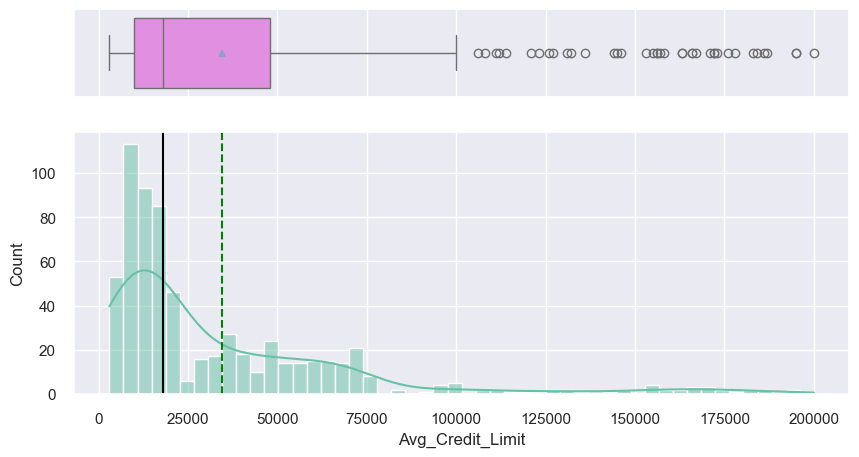

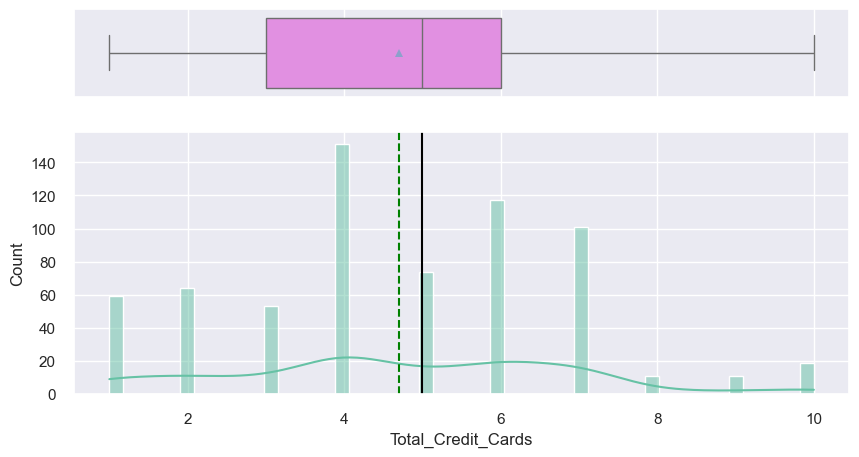

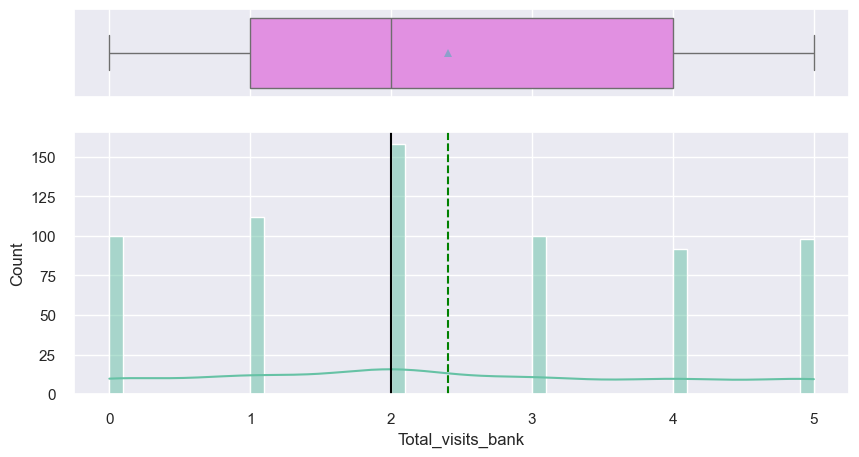

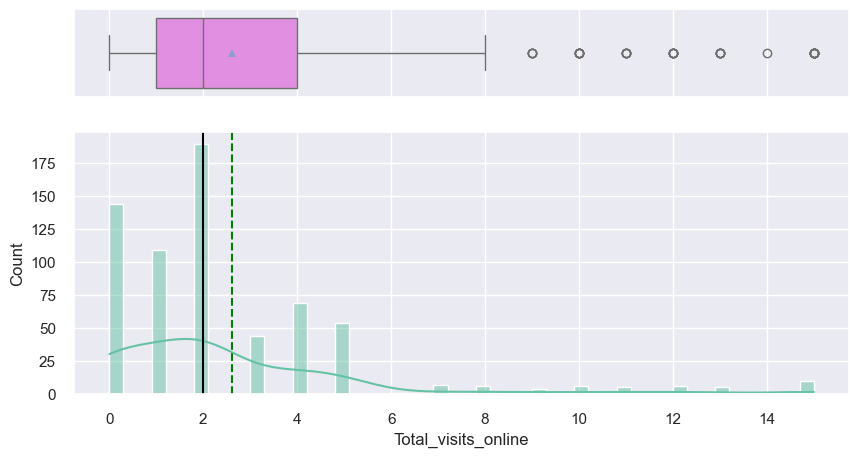

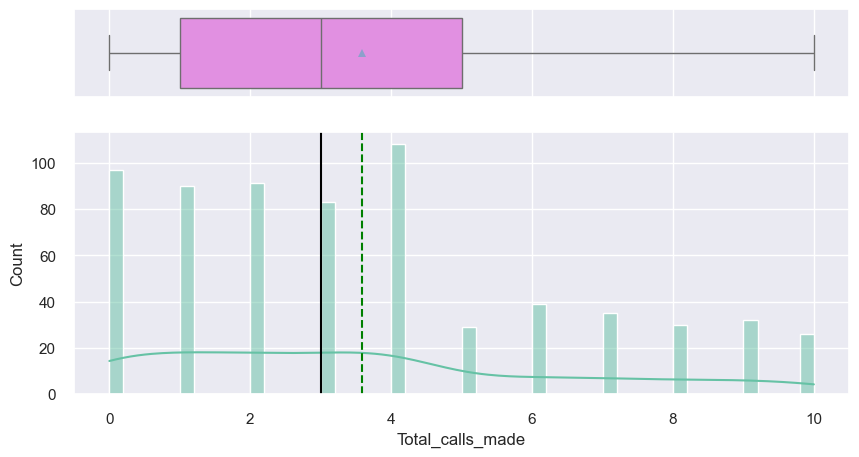

In [554]:
# selecting numerical columns
num_cols = data.select_dtypes(include=np.number).columns.tolist()

for item in num_cols:
    histogram_boxplot(data, item, bins=50, kde=True, figsize=(10, 5))

## AVerage credit limit

### Creating graph with available data in average credit limit

In [556]:
data['cc_spending_bin'] = pd.cut(data['Avg_Credit_Limit'], bins=[3000,	10000,	18000, 	48000,	200000]
                                ,labels=['Very Low', 'Low', 'Mid', 'High'], include_lowest=True)

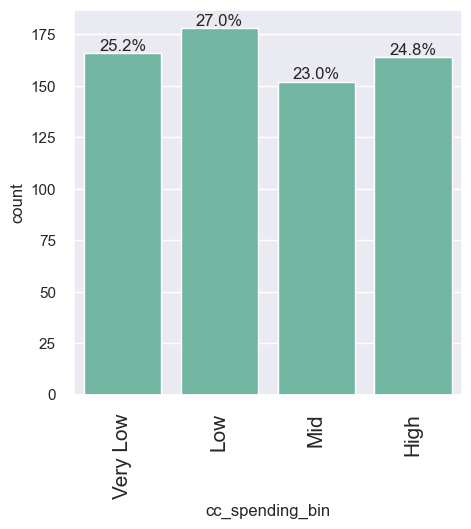

In [557]:
labeled_barplot(data, 'cc_spending_bin', perc=True)

* 25% of people are having very low average credit limit
* 27% of people are having low credit card limit
* 25% of people are having very high credit card limit


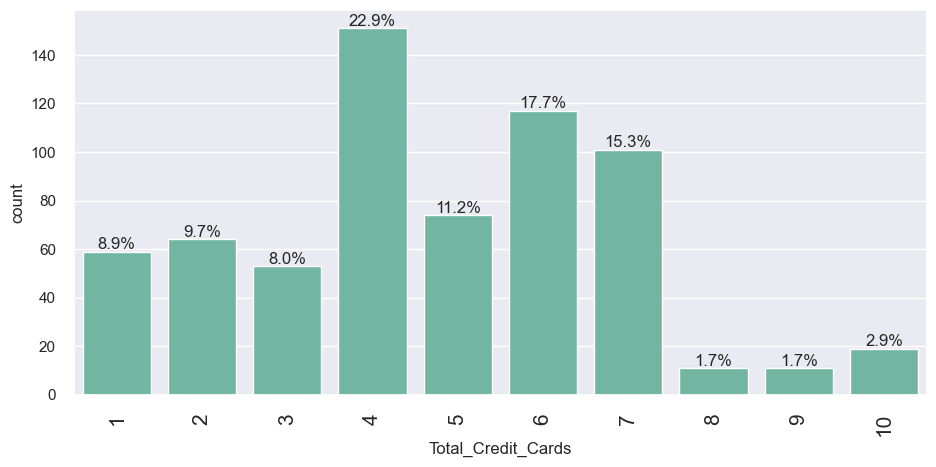

In [559]:
labeled_barplot(data, 'Total_Credit_Cards', perc=True)

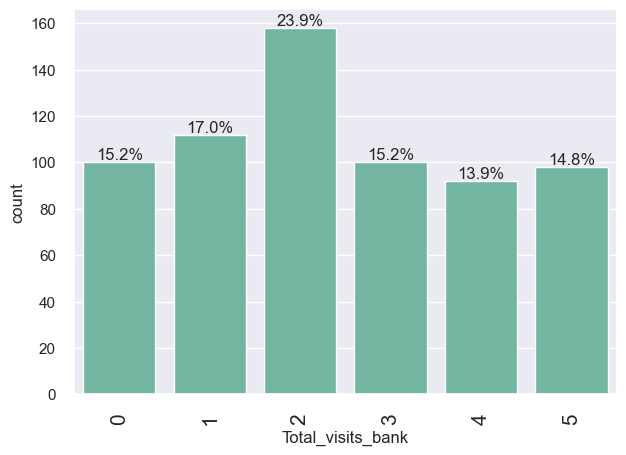

In [560]:
labeled_barplot(data, 'Total_visits_bank', perc=True)

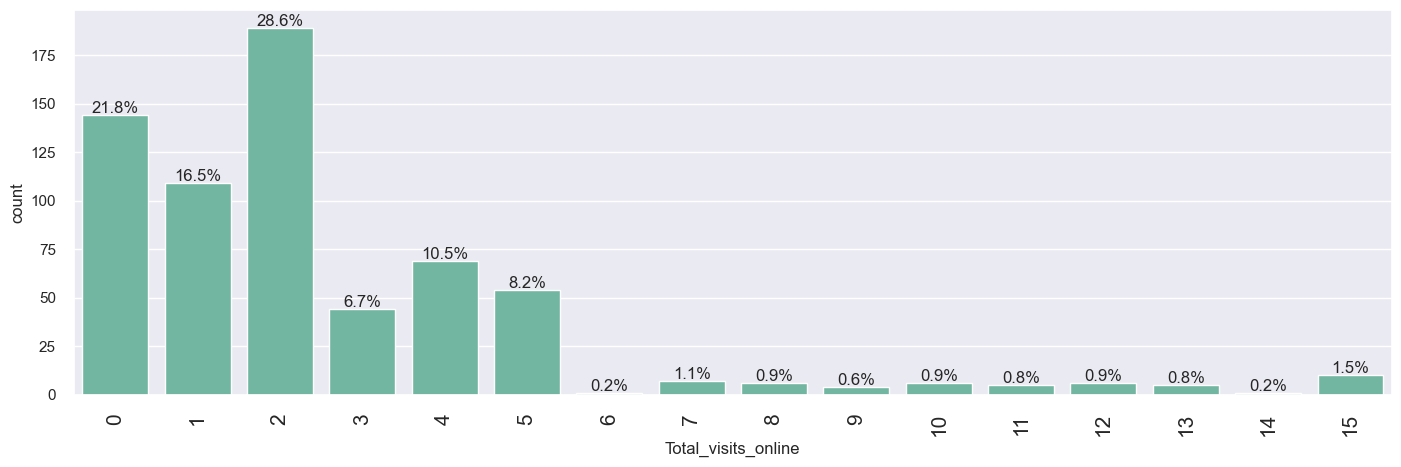

In [561]:
labeled_barplot(data, 'Total_visits_online', perc=True)

* Data is right skewed
*	22%peoplenever made online visits
*	17% people made 1-time online visit
*	29% people made 2 times visit


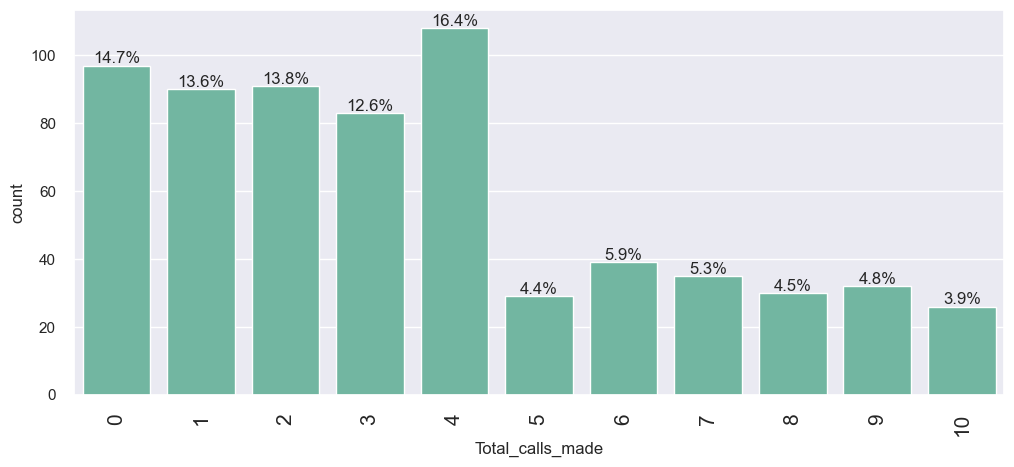

In [563]:
labeled_barplot(data, 'Total_calls_made', perc=True)

* 15% people made no calls to the bank
*	14% people made 1 time 
*	17% people made calls 4 times 
*	4% people made calls 10 times


## Bivariate Analysis

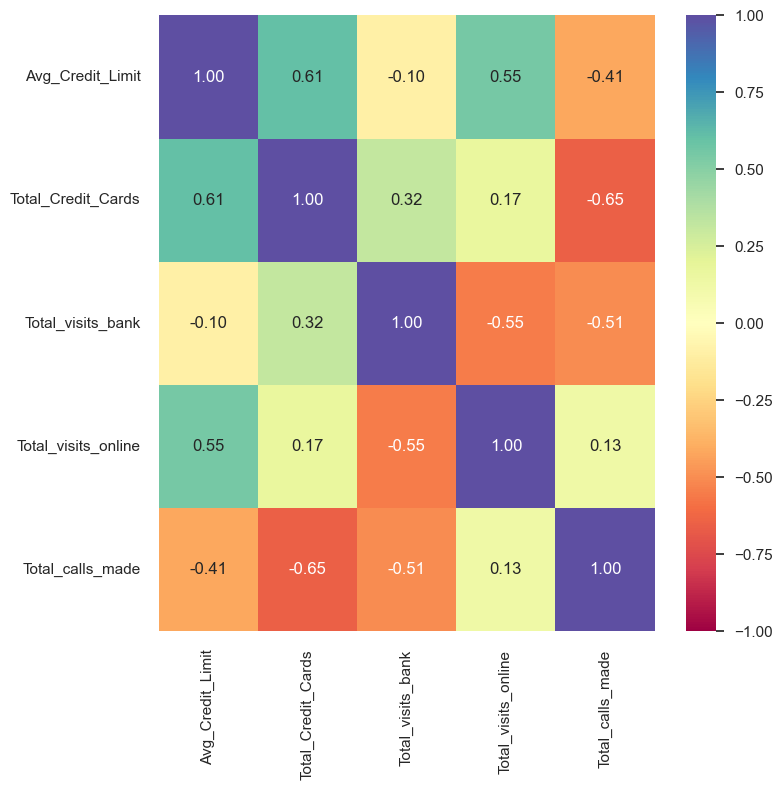

In [566]:
plt.figure(figsize=(8,8))
sns.heatmap(
    data[num_cols].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

* Average credit limit is positively correlated with total credit cards which obvious and which indicated customers having more credit cards are having more average credit limit
*	Total credit cards is negatively correlated with total calls made which indicates customers having more credit cards tends to make less calls 
*	Total visits bank is negatively correlated with total visits online which indicates customers who visits bank physically wont visit online portal and vice versa
*	Total visits bank is negatively correlated with total calls made which indicates customers who visits bank tends to make less calls to the bank and vice versa


<Figure size 2000x2000 with 0 Axes>

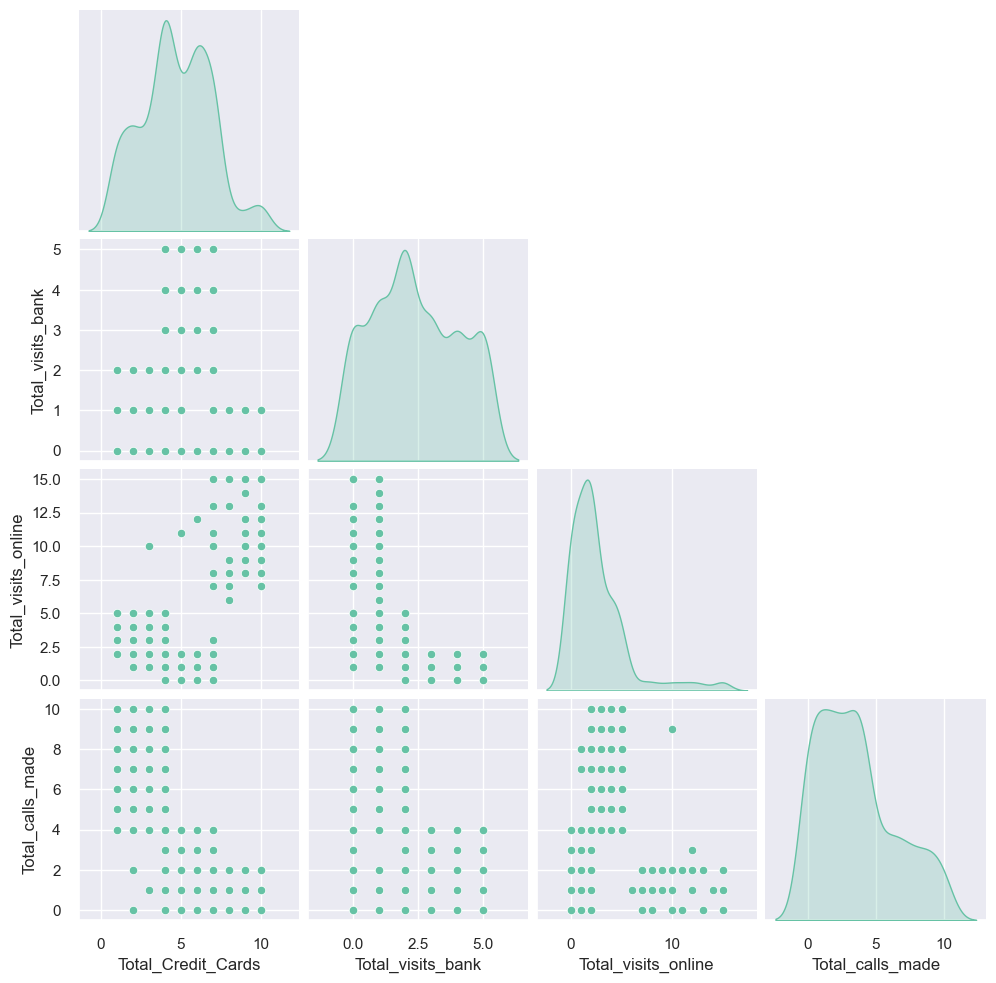

In [568]:
plt.figure(figsize=(20,20));
sns.set(palette="Set2");
sns.pairplot(data.iloc[:, 1:], diag_kind='kde', corner=True);

## Data Preprocessing

### Outlier Check

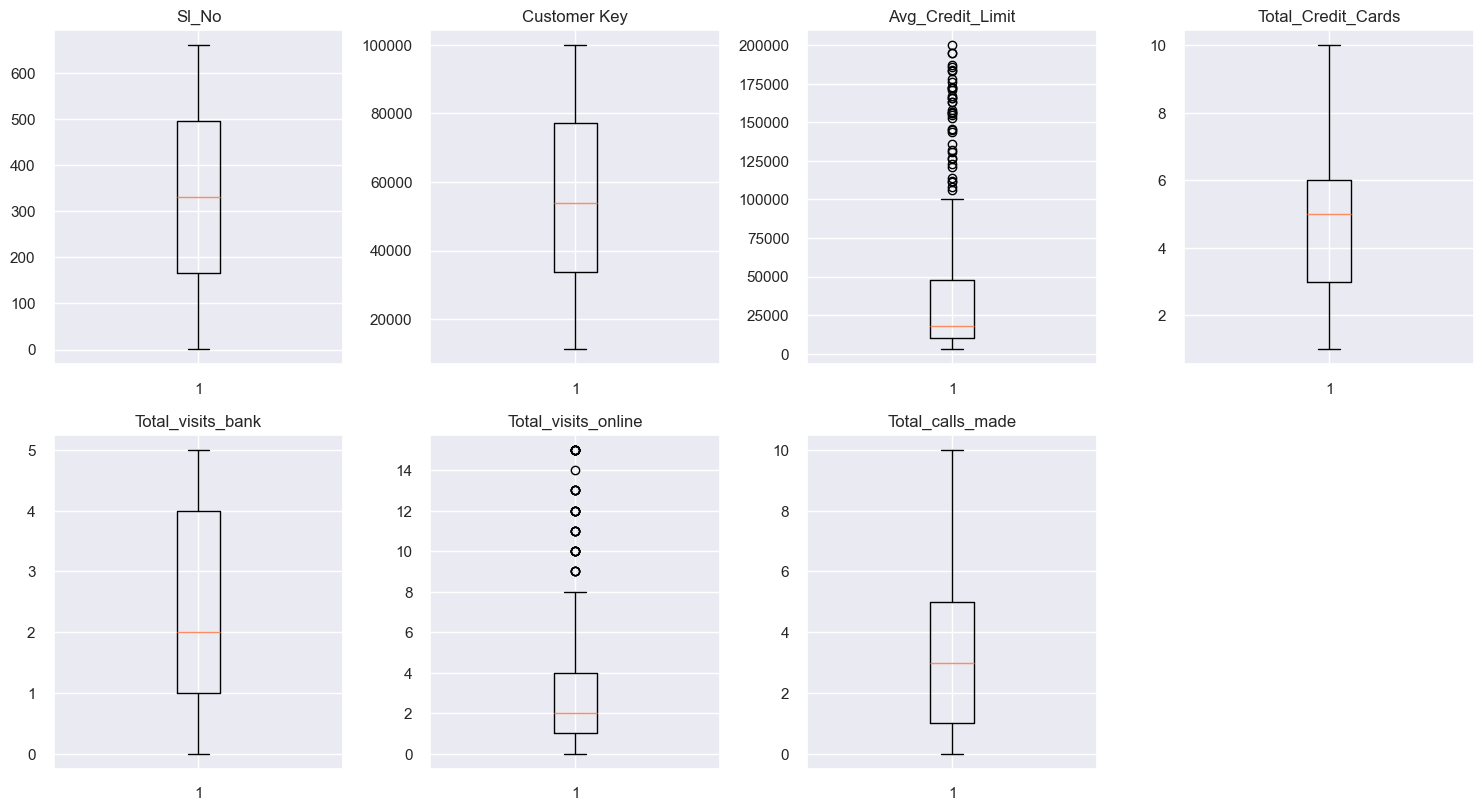

In [571]:
plt.figure(figsize=(15, 12))

numeric_columns = df.select_dtypes(include=np.number).columns.tolist()

for i, variable in enumerate(numeric_columns):
    plt.subplot(3, 4, i + 1)
    plt.boxplot(df[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

In [572]:
# variables used for clustering
num_col = data.select_dtypes(include=np.number).columns.tolist()  # Define num_col here
num_col  # Use the defined variable

['Avg_Credit_Limit',
 'Total_Credit_Cards',
 'Total_visits_bank',
 'Total_visits_online',
 'Total_calls_made']

In [573]:
# scaling the data before clustering
scaler = StandardScaler()
subset = data[num_col].copy()  ## Complete the code to scale the data
subset_scaled = scaler.fit_transform(subset)

In [574]:
data.head()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,cc_spending_bin
0,100000,2,1,1,0,High
1,50000,3,0,10,9,High
2,50000,7,1,3,4,High
3,30000,5,1,1,4,Mid
4,100000,6,0,12,3,High


In [575]:
# creating a dataframe of the scaled data
subset_scaled_data = pd.DataFrame(subset_scaled, columns=subset.columns)

In [576]:
subset_scaled_data.head()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1.740187,-1.249225,-0.860451,-0.547490,-1.251537
1,0.410293,-0.787585,-1.473731,2.520519,1.891859
2,0.410293,1.058973,-0.860451,0.134290,0.145528
3,-0.121665,0.135694,-0.860451,-0.547490,0.145528
4,1.740187,0.597334,-1.473731,3.202298,-0.203739


## K-means Clustering

### Checking Elbow Plot

In [579]:
k_means_dt = subset_scaled_data.copy()

Number of Clusters: 1 	Average Distortion: 2.0069222262503614
Number of Clusters: 2 	Average Distortion: 1.7178787250175893
Number of Clusters: 3 	Average Distortion: 1.1466276549150365
Number of Clusters: 4 	Average Distortion: 1.0902973540817664
Number of Clusters: 5 	Average Distortion: 0.9906853650098948
Number of Clusters: 6 	Average Distortion: 0.9515009282361341
Number of Clusters: 7 	Average Distortion: 0.9094119827472316
Number of Clusters: 8 	Average Distortion: 0.9191292344244387
Number of Clusters: 9 	Average Distortion: 0.8990131857179275
Number of Clusters: 10 	Average Distortion: 0.8723089051392604
Number of Clusters: 11 	Average Distortion: 0.8353621156593081
Number of Clusters: 12 	Average Distortion: 0.80956116944126
Number of Clusters: 13 	Average Distortion: 0.7950761910849837
Number of Clusters: 14 	Average Distortion: 0.7740825528304729


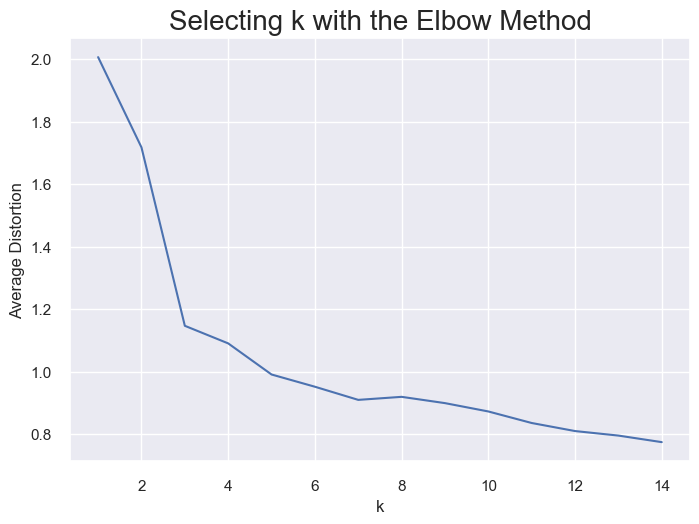

In [580]:
clusters = range(1, 15)
meanDistortions = []

for k in clusters:
    model = KMeans(n_clusters=k, random_state=1)
    model.fit(subset_scaled_data)
    prediction = model.predict(k_means_dt)
    distortion = (
        sum(np.min(cdist(k_means_dt, model.cluster_centers_, "euclidean"), axis=1))
        / k_means_dt.shape[0]
    )

    meanDistortions.append(distortion)

    print("Number of Clusters:", k, "\tAverage Distortion:", distortion)

plt.plot(clusters, meanDistortions, "bx-")
plt.xlabel("k")
plt.ylabel("Average Distortion")
plt.title("Selecting k with the Elbow Method", fontsize=20)
plt.show()

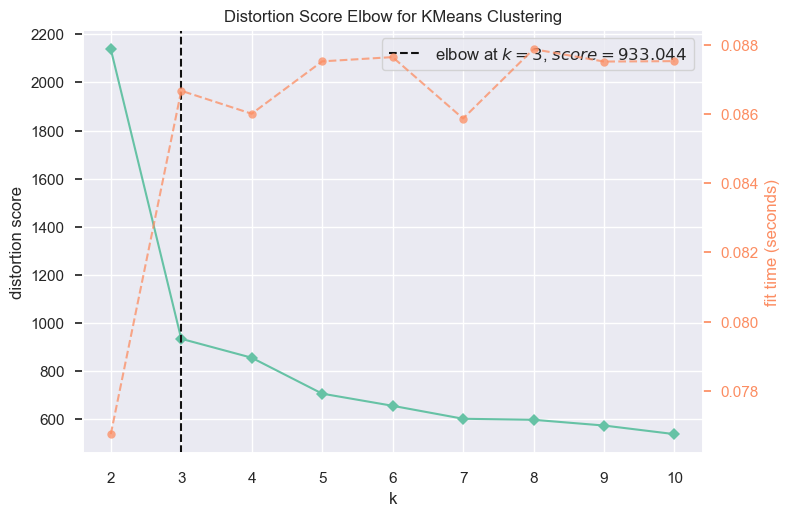

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [581]:
model = KMeans(random_state=1)
visualizer = KElbowVisualizer(model, k=(2, 11), timings=True)
visualizer.fit(subset_scaled_data)  # fit the data to the visualizer
visualizer.show()  # finalize and render figure

In [582]:
#Set the value of k=3
kmeans = KMeans(n_clusters=3, n_init = 15, random_state=13)

In [583]:
kmeans.fit(subset_scaled_data)
label = kmeans.predict(subset_scaled_data)
df_ScaledKMeans = subset_scaled_data  # Retain the values for the  Sihouette Score             
label_KMeans = label    # Retain the values for the  Sihouette Score  

In [584]:
centroids = kmeans.cluster_centers_
centroids

array([[-0.02106178,  0.37368962,  0.6663945 , -0.55367163, -0.55300488],
       [ 2.83176409,  1.86222621, -1.10576269,  2.82731942, -0.87432983],
       [-0.59579625, -1.05962278, -0.9015185 ,  0.32299678,  1.14810882]])

In [585]:
#Calculate the centroids for the columns to profile
centroid_df = pd.DataFrame(centroids, columns = list(subset_scaled_data) )

In [586]:
print(centroid_df)

   Avg_Credit_Limit  Total_Credit_Cards  Total_visits_bank  \
0         -0.021062            0.373690           0.666395   
1          2.831764            1.862226          -1.105763   
2         -0.595796           -1.059623          -0.901518   

   Total_visits_online  Total_calls_made  
0            -0.553672         -0.553005  
1             2.827319         -0.874330  
2             0.322997          1.148109  


In [587]:
# Cluster 2 has the lowest values (-0.636295) and cluster 3 has the highest values (2.498861)
print('Minimum values: \n', centroid_df.min().sort_values())

print('\n Maximum values: \n', centroid_df.max().sort_values())

Minimum values: 
 Total_visits_bank     -1.105763
Total_Credit_Cards    -1.059623
Total_calls_made      -0.874330
Avg_Credit_Limit      -0.595796
Total_visits_online   -0.553672
dtype: float64

 Maximum values: 
 Total_visits_bank      0.666395
Total_calls_made       1.148109
Total_Credit_Cards     1.862226
Total_visits_online    2.827319
Avg_Credit_Limit       2.831764
dtype: float64


### Let's check the silhouette scores

For n_clusters = 2, the silhouette score is 0.5703183487340514)
For n_clusters = 3, the silhouette score is 0.5157182558881063)
For n_clusters = 4, the silhouette score is 0.3744071798973986)
For n_clusters = 5, the silhouette score is 0.27167502160723267)
For n_clusters = 6, the silhouette score is 0.24804756291576194)
For n_clusters = 7, the silhouette score is 0.24791254258020035)
For n_clusters = 8, the silhouette score is 0.22570382558070443)
For n_clusters = 9, the silhouette score is 0.19931783829027247)
For n_clusters = 10, the silhouette score is 0.20939001908412339)
For n_clusters = 11, the silhouette score is 0.21874494421167007)
For n_clusters = 12, the silhouette score is 0.21076471529358776)
For n_clusters = 13, the silhouette score is 0.2110262471212854)
For n_clusters = 14, the silhouette score is 0.21513441980318038)


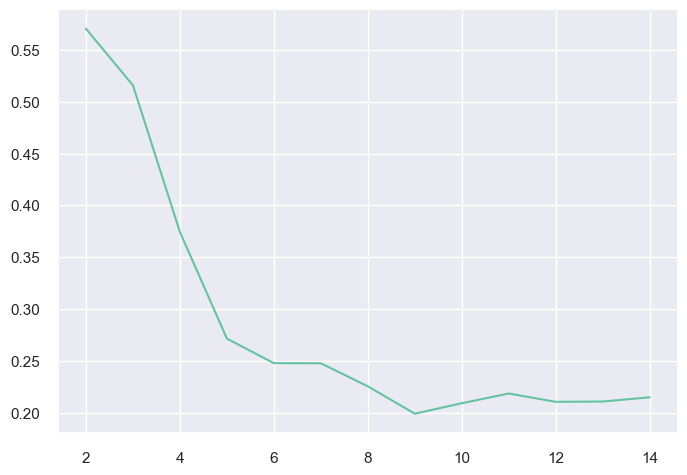

In [589]:
sil_score = []
cluster_list = range(2, 15)
for n_clusters in cluster_list:
    clusterer = KMeans(n_clusters=n_clusters, random_state=1)
    preds = clusterer.fit_predict((subset_scaled_data))
    score = silhouette_score(k_means_dt, preds)
    sil_score.append(score)
    print("For n_clusters = {}, the silhouette score is {})".format(n_clusters, score))

plt.plot(cluster_list, sil_score)
plt.show()

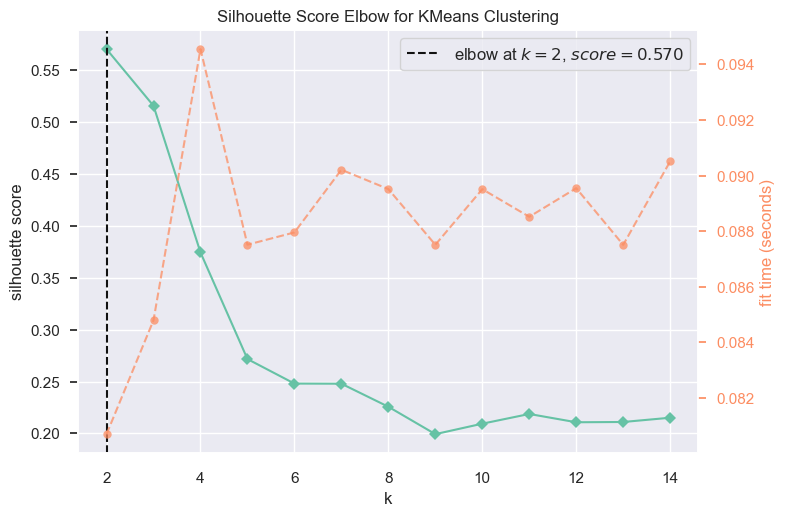

<Axes: title={'center': 'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [590]:
model = KMeans(random_state=1)
visualizer = KElbowVisualizer(model, k=(2, 15), metric="silhouette", timings=True)
visualizer.fit(k_means_dt)  # fit the data to the visualizer
visualizer.show()  # finalize and render figure

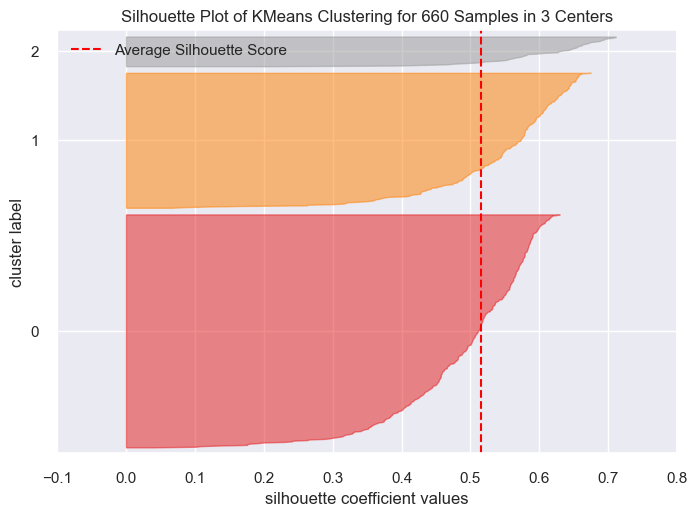

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 660 Samples in 3 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [591]:
# finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(3, random_state=1))  ## Complete the code to visualize the silhouette scores for certain number of clusters
visualizer.fit(k_means_dt)
visualizer.show()

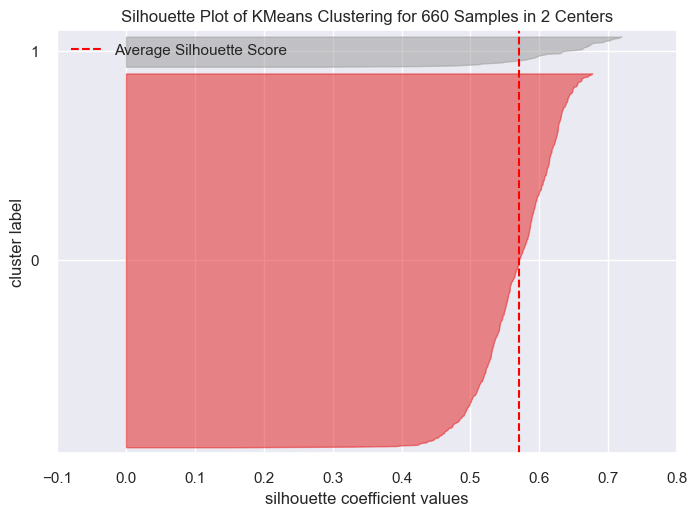

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 660 Samples in 2 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [592]:
# finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(2, random_state=1))  ## Complete the code to visualize the silhouette scores for certain number of clusters
visualizer.fit(k_means_dt)
visualizer.show()

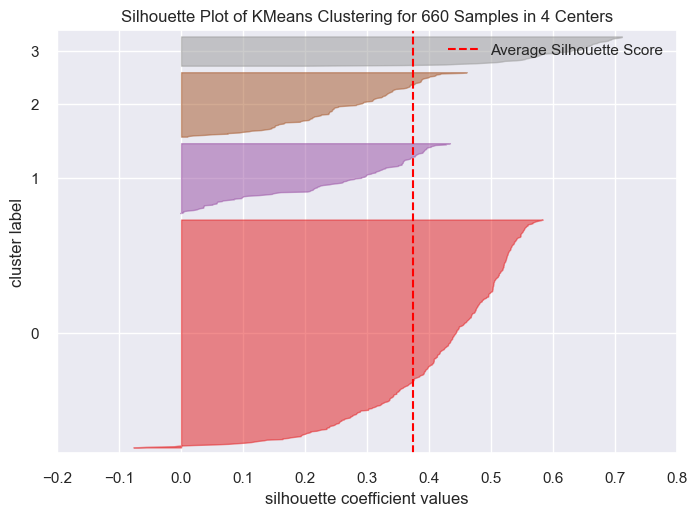

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 660 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [593]:
# finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(4, random_state=1))  ## Complete the code to visualize the silhouette scores for certain number of clusters
visualizer.fit(k_means_dt)
visualizer.show()

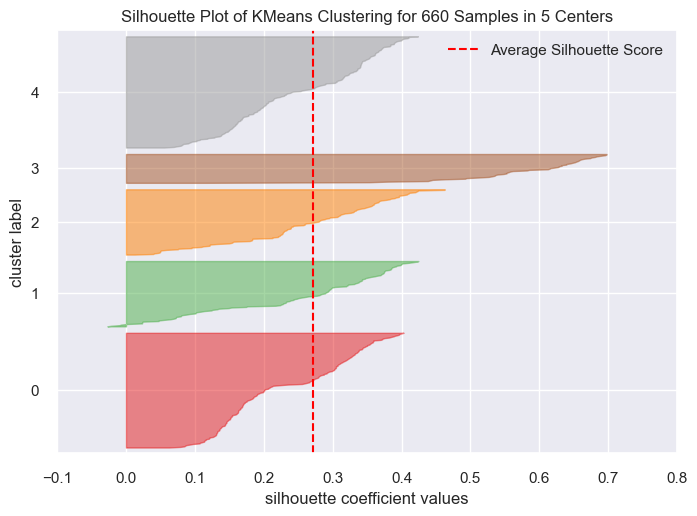

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 660 Samples in 5 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [594]:
# finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(5, random_state=1))  ## Complete the code to visualize the silhouette scores for certain number of clusters
visualizer.fit(k_means_dt)
visualizer.show()

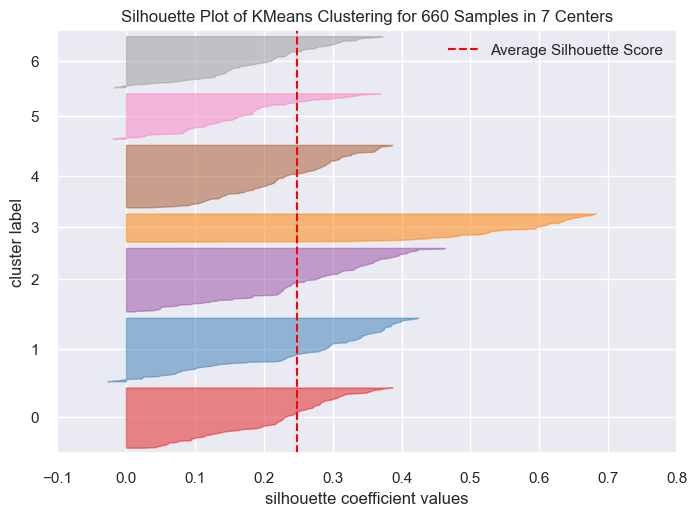

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 660 Samples in 7 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [701]:
# finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(7, random_state=1))  ## Complete the code to visualize the silhouette scores for certain number of clusters
visualizer.fit(k_means_dt)
visualizer.show()

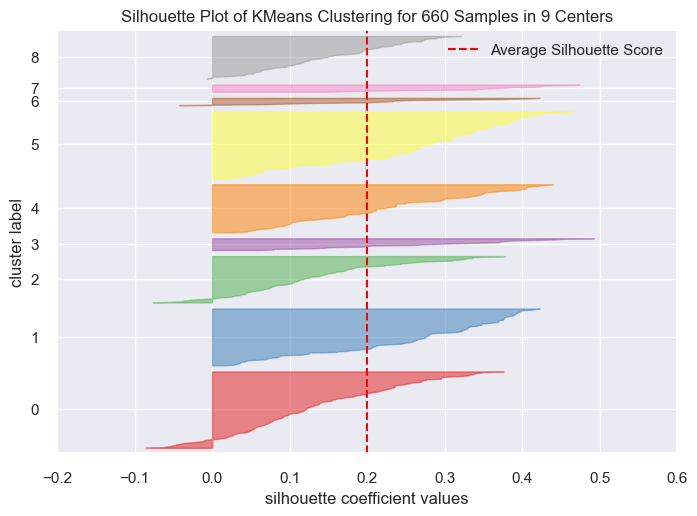

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 660 Samples in 9 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [596]:
# finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(9, random_state=1))  ## Complete the code to visualize the silhouette scores for certain number of clusters
visualizer.fit(k_means_dt)
visualizer.show()

## BY seeing the above visualization we can fix the k value = 3

## Creating Final Model

In [599]:
# final K-means model
kmeans = KMeans(n_clusters=3, random_state=1)  ## Complete the code to choose the number of clusters
kmeans.fit(k_means_dt)

KMeans(n_clusters=3, random_state=1)

In [600]:
# adding kmeans cluster labels to the original and scaled dataframes

# df["K_means_segments"] = kmeans.labels_
subset_scaled_data["K_means_segments"] = kmeans.labels_

### Cluster Profiling

In [602]:
## creating a new dataframe only for labels and converting it into categorical variable
df_labels = pd.DataFrame(kmeans.labels_ , columns = list(['labels']))

df_labels['labels'] = df_labels['labels'].astype('category')

In [603]:
# Joining the label dataframe with the data frame.
df_labeled = df.join(df_labels)

In [604]:
df_analysis = (df_labeled.groupby(['labels'] , axis=0)).count()  # the groupby creates a grouped dataframe that needs 
# to be converted back to dataframe. 
df_analysis

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
labels,,,,,,,
0,386,386,386,386,386,386,386
1,224,224,224,224,224,224,224
2,50,50,50,50,50,50,50


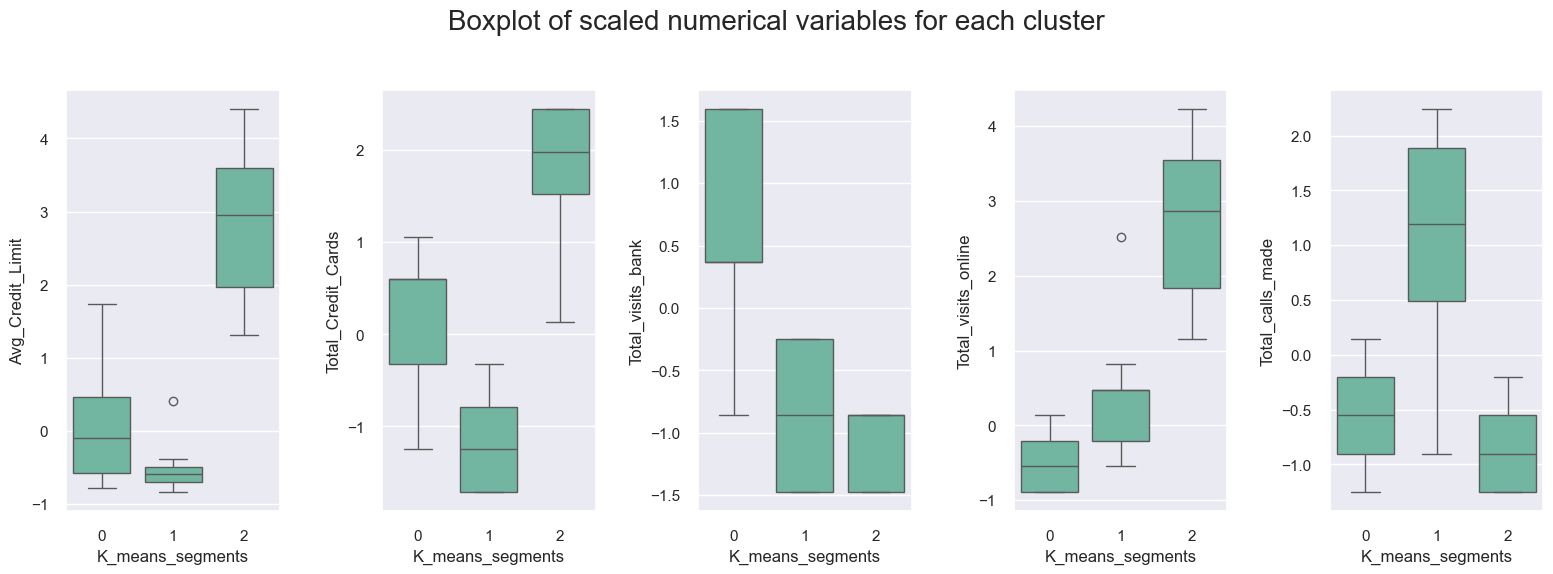

In [605]:
fig, axes = plt.subplots(1, 5, figsize=(16, 6))
fig.suptitle("Boxplot of scaled numerical variables for each cluster", fontsize=20)
counter = 0
for ii in range(5):
    sns.boxplot(
        ax=axes[ii],
        y=subset_scaled_data[num_col[counter]],
        x=subset_scaled_data["K_means_segments"],
    )
    counter = counter + 1

fig.tight_layout(pad=2.0)

### Cluster 0

This cluster contains customer who 
* is having average creditcard limit
* is having maximum of 1 credit card
* visited the bank physically
* less online interactions
* Minimum calls made to the cuatomer care

### Cluster 1 

This cluster contains customer who 

* is having very less credit card limit
* is having 0 credit cards
* almost no phyical interaction with bank
* less online interactions
* maximum calls made to the customer care

### Cluster 2

This cluster contains customer who 

* is having maximum creditcard limit
* is having more than 2 credit card
* no physical interactions with the bank 
* more  online interactions
* No calls made to the cuatomer care


## Hierarchical Clustering

### Computing Cophenetic Correlation

In [609]:
# list of distance metrics
distance_metrics = ["euclidean", "chebyshev", "mahalanobis", "cityblock"]

# list of linkage methods
linkage_methods = ["single", "complete", "average", "weighted"]

high_cophenet_corr = 0
high_dm_lm = [0, 0]

for dm in distance_metrics:
    for lm in linkage_methods:
        Z = linkage(subset_scaled_data, metric=dm, method=lm)
        c, coph_dists = cophenet(Z, pdist(subset_scaled_data))
        print(
            "Cophenetic correlation for {} distance and {} linkage is {}.".format(
                dm.capitalize(), lm, c
            )
        )
        if high_cophenet_corr < c:
            high_cophenet_corr = c
            high_dm_lm[0] = dm
            high_dm_lm[1] = lm

Cophenetic correlation for Euclidean distance and single linkage is 0.8788676940541079.
Cophenetic correlation for Euclidean distance and complete linkage is 0.8860521900934342.
Cophenetic correlation for Euclidean distance and average linkage is 0.9168725782090766.
Cophenetic correlation for Euclidean distance and weighted linkage is 0.9133393931042242.
Cophenetic correlation for Chebyshev distance and single linkage is 0.8978014062578786.
Cophenetic correlation for Chebyshev distance and complete linkage is 0.8623270916886306.
Cophenetic correlation for Chebyshev distance and average linkage is 0.9160784250471772.
Cophenetic correlation for Chebyshev distance and weighted linkage is 0.9109044268579872.
Cophenetic correlation for Mahalanobis distance and single linkage is 0.8959952526724237.
Cophenetic correlation for Mahalanobis distance and complete linkage is 0.6550023123197827.
Cophenetic correlation for Mahalanobis distance and average linkage is 0.8467618899578894.
Cophenetic co

In [610]:
# printing the combination of distance metric and linkage method with the highest cophenetic correlation
print(
    "Highest cophenetic correlation is {}, which is obtained with {} distance and {} linkage.".format(
        high_cophenet_corr, high_dm_lm[0].capitalize(), high_dm_lm[1]
    )
)

Highest cophenetic correlation is 0.9168725782090766, which is obtained with Euclidean distance and average linkage.


**Let's explore different linkage methods with Euclidean distance only.**

In [612]:
# list of linkage methods
linkage_methods = ["single", "complete", "average", "centroid", "ward", "weighted"]

high_cophenet_corr = 0
high_dm_lm = [0, 0]

for lm in linkage_methods:
    Z = linkage(subset_scaled_data, metric="euclidean", method=lm)
    c, coph_dists = cophenet(Z, pdist(subset_scaled_data))
    print("Cophenetic correlation for {} linkage is {}.".format(lm, c))
    if high_cophenet_corr < c:
        high_cophenet_corr = c
        high_dm_lm[0] = "euclidean"
        high_dm_lm[1] = lm

Cophenetic correlation for single linkage is 0.8788676940541079.
Cophenetic correlation for complete linkage is 0.8860521900934342.
Cophenetic correlation for average linkage is 0.9168725782090766.
Cophenetic correlation for centroid linkage is 0.9134704636213649.
Cophenetic correlation for ward linkage is 0.774233615737438.
Cophenetic correlation for weighted linkage is 0.9133393931042242.


In [613]:
# printing the combination of distance metric and linkage method with the highest cophenetic correlation
print(
    "Highest cophenetic correlation is {}, which is obtained with {} linkage.".format(
        high_cophenet_corr, high_dm_lm[1]
    )
)

Highest cophenetic correlation is 0.9168725782090766, which is obtained with average linkage.


### Checking Dendrograms

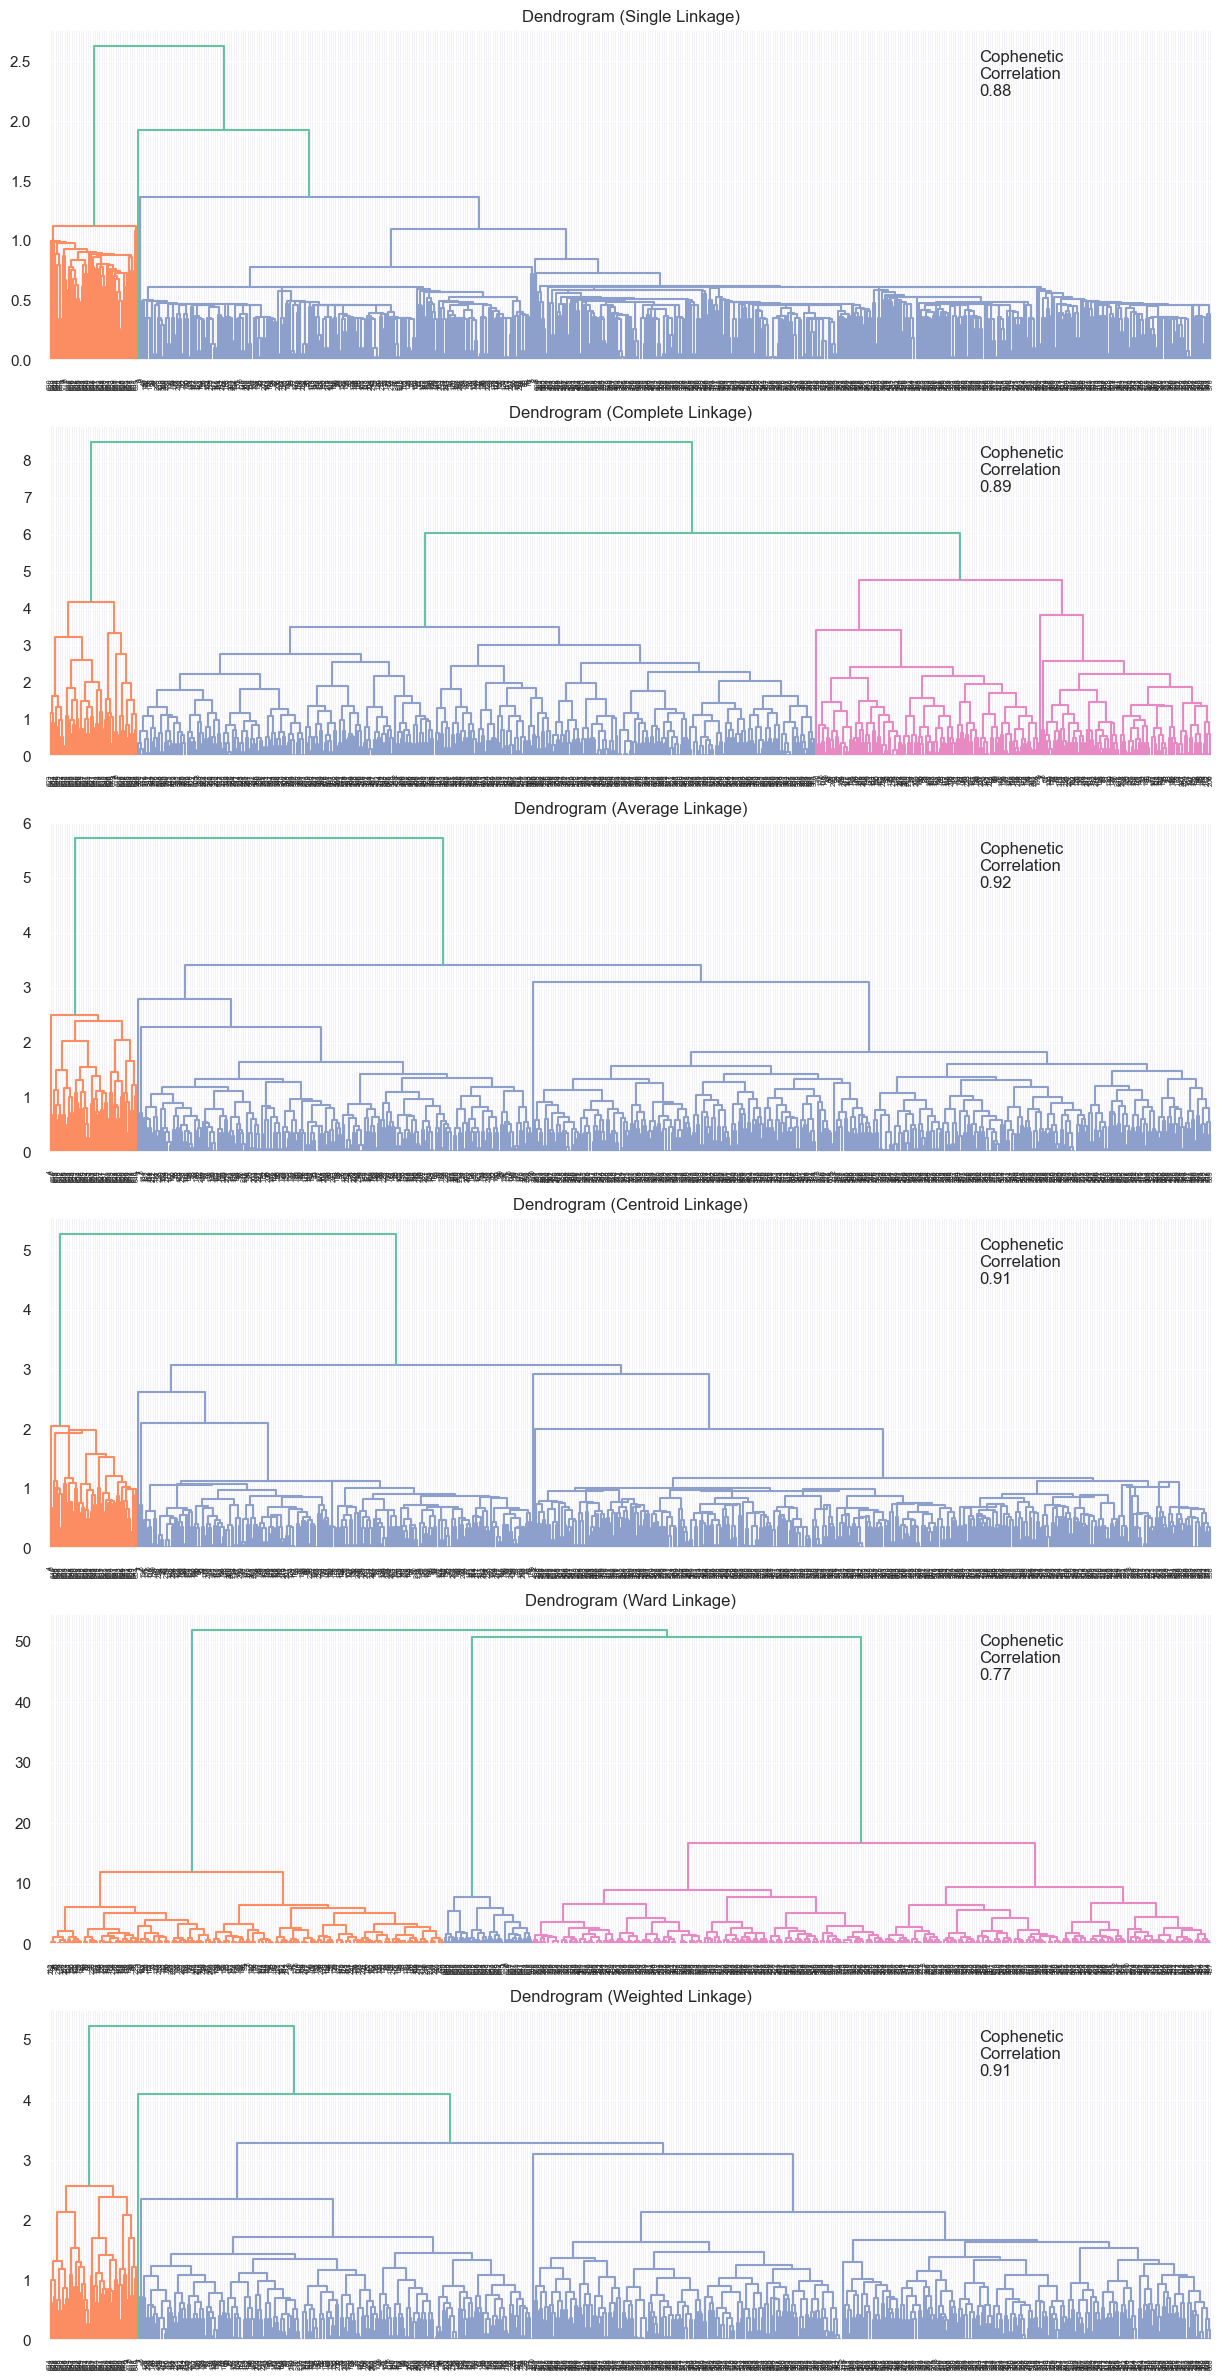

In [616]:
# list of linkage methods
linkage_methods = ["single", "complete", "average", "centroid", "ward", "weighted"]

# lists to save results of cophenetic correlation calculation
compare_cols = ["Linkage", "Cophenetic Coefficient"]
compare = []

# to create a subplot image
fig, axs = plt.subplots(len(linkage_methods), 1, figsize=(15, 30))

# We will enumerate through the list of linkage methods above
# For each linkage method, we will plot the dendrogram and calculate the cophenetic correlation
for i, method in enumerate(linkage_methods):
    Z = linkage(subset_scaled_data, metric="euclidean", method=method)

    dendrogram(Z, ax=axs[i])
    axs[i].set_title(f"Dendrogram ({method.capitalize()} Linkage)")

    coph_corr, coph_dist = cophenet(Z, pdist(subset_scaled_data ))
    axs[i].annotate(
        f"Cophenetic\nCorrelation\n{coph_corr:0.2f}",
        (0.80, 0.80),
        xycoords="axes fraction",
    )

    compare.append([method, coph_corr])

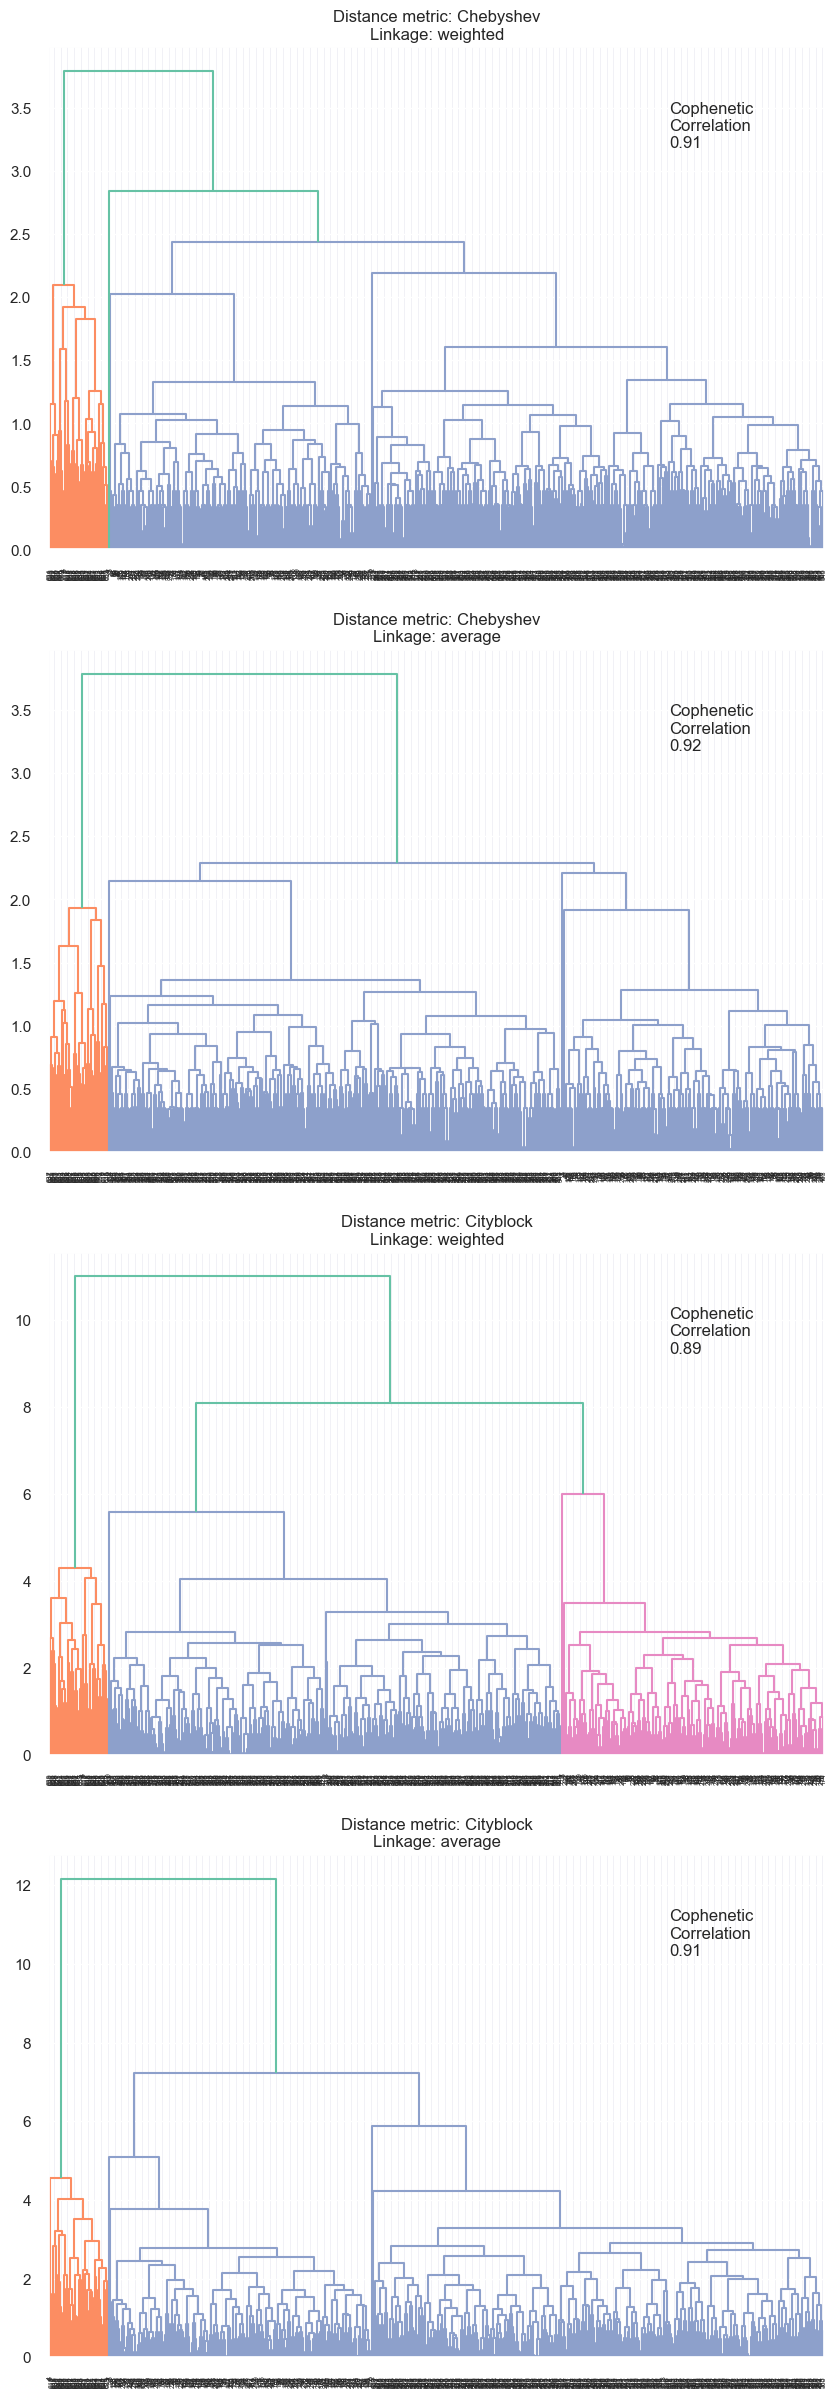

In [617]:
# list of distance metrics
distance_metrics = ["Chebyshev", "cityblock"]

# list of linkage methods
linkage_methods = ["weighted", "average"]

# to create a subplot image
fig, axs = plt.subplots(
    len(distance_metrics) + len(distance_metrics), 1, figsize=(10, 30)
)

i = 0
for dm in distance_metrics:
    for lm in linkage_methods:
        Z = linkage(subset_scaled_data, metric=dm, method=lm)

        dendrogram(Z, ax=axs[i])
        axs[i].set_title("Distance metric: {}\nLinkage: {}".format(dm.capitalize(), lm))

        coph_corr, coph_dist = cophenet(Z, pdist(subset_scaled_data))
        axs[i].annotate(
            f"Cophenetic\nCorrelation\n{coph_corr:0.2f}",
            (0.80, 0.80),
            xycoords="axes fraction",
        )
        i += 1

In [618]:
# let's create a dataframe to compare cophenetic correlations for each linkage method
df_cc = pd.DataFrame(compare, columns=compare_cols)
df_cc

,Linkage,Cophenetic Coefficient
0,single,0.878868
1,complete,0.886052
2,average,0.916873
3,centroid,0.913470
4,ward,0.774234
5,weighted,0.913339


### Creating Final Model

**Let's create 3 clusters.**

In [621]:
from sklearn.cluster import AgglomerativeClustering  # Import AgglomerativeClustering
HCmodel = AgglomerativeClustering(n_clusters=3, linkage="average")
HCmodel.fit(subset_scaled_data)

AgglomerativeClustering(linkage='average', n_clusters=3)

## Cluster Profiling

In [623]:
subset_scaled_data["hc_cluster"] = HCmodel.labels_
df["hc_cluster"] = HCmodel.labels_
data["hc_cluster"] = HCmodel.labels_ # This line ensures 'hc_cluster' is in 'data'


In [624]:
# Cluster Profiling
# Include all relevant numerical columns for profiling, including 'Avg_Credit_Limit'
cluster_profile_hc = data[['Avg_Credit_Limit', 'Total_Credit_Cards', 'Total_visits_bank', 
                           'Total_visits_online', 'Total_calls_made', 'hc_cluster']].groupby('hc_cluster').mean()  # Include 'hc_cluster' in the selected columns

# Instead of using the dropped 'customer_key', use the index to count customers
cluster_profile_hc['count_of_customers'] = data.groupby('hc_cluster').size() 

cluster_profile_hc.style.highlight_max(color='lightgreen').highlight_min(color='pink') 

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,count_of_customers
hc_cluster,,,,,,
0,33782.383420,5.515544,3.489637,0.981865,2.000000,386
1,141040.000000,8.740000,0.600000,10.900000,1.080000,50
2,12174.107143,2.410714,0.933036,3.553571,6.870536,224


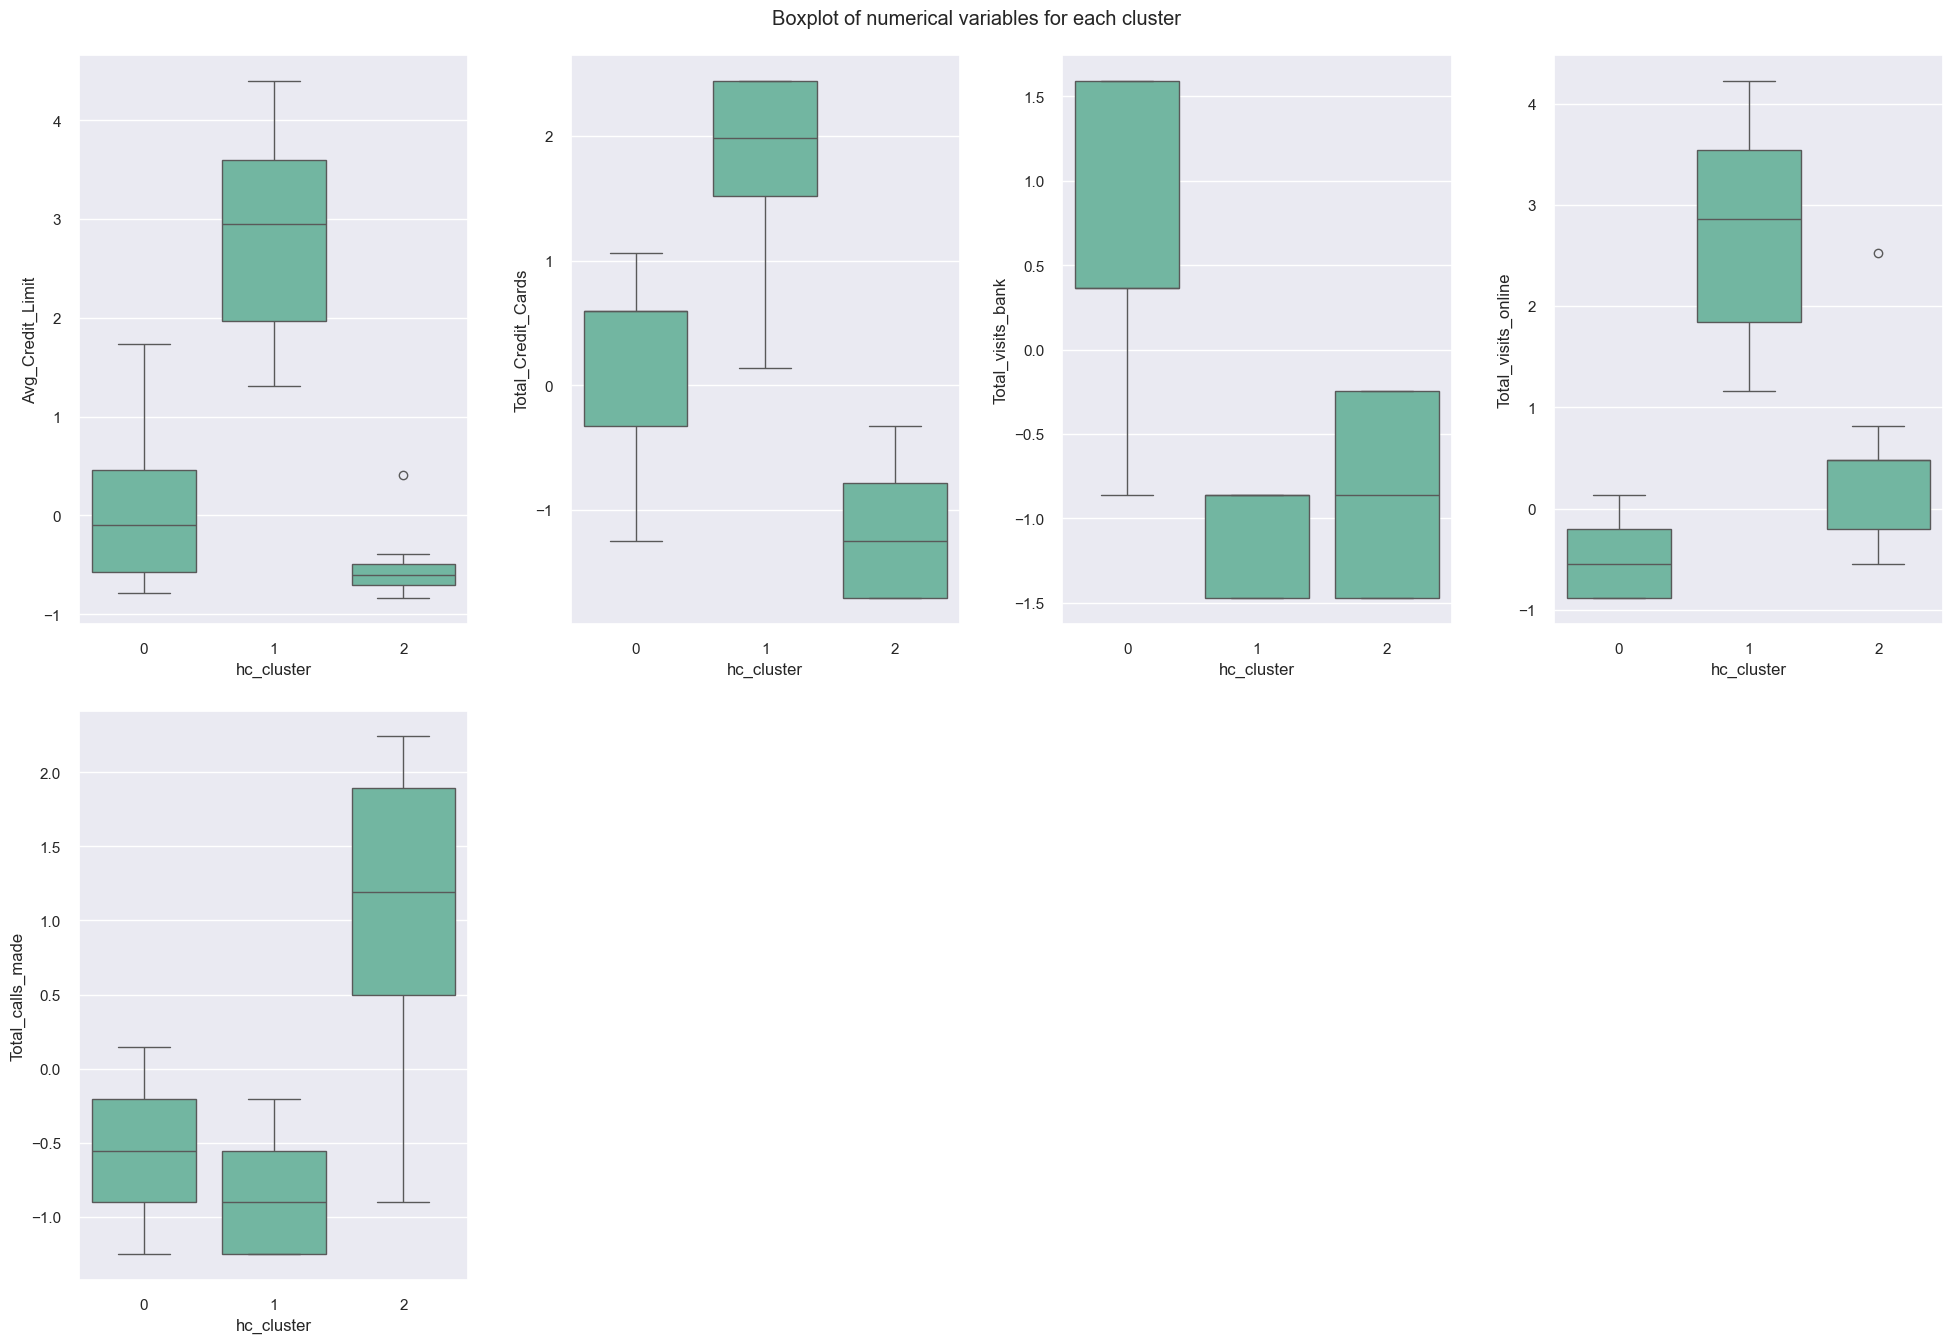

In [625]:
plt.figure(figsize=(20, 20))
plt.suptitle("Boxplot of numerical variables for each cluster")

for i, variable in enumerate(num_col):
    plt.subplot(3, 4, i + 1)
    # Use 'hc_cluster' instead of 'HC_segments' for the x-axis
    sns.boxplot(data=subset_scaled_data, x="hc_cluster", y=variable) 
#
plt.tight_layout(pad=2.0)

# Insights

### Cluster 0

This cluster contains customer who 
* is having average creditcard limit
* is having maximum of 1 credit card
* visited the bank physically
* less online interactions
* Minimum calls made to the cuatomer care

### Cluster 1 

This cluster contains customer who 

* is having very less credit card limit
* is having 0 credit cards
* almost no phyical interaction with bank
* less online interactions
* maximum calls made to the customer care

### Cluster 2

This cluster contains customer who 
* is having maximum creditcard limit
* is having more than 2 credit card
* no physical interactions with the bank 
* more  online interactions
* No calls made to the customer care


## K-means vs Hierarchical Clustering

In [628]:
df_analysis.style.highlight_max(color="lightgreen", axis=0)

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
labels,,,,,,,
0,386,386,386,386,386,386,386
1,224,224,224,224,224,224,224
2,50,50,50,50,50,50,50


In [629]:
cluster_profile_hc.style.highlight_max(color='lightgreen').highlight_min(color='pink') 

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,count_of_customers
hc_cluster,,,,,,
0,33782.383420,5.515544,3.489637,0.981865,2.000000,386
1,141040.000000,8.740000,0.600000,10.900000,1.080000,50
2,12174.107143,2.410714,0.933036,3.553571,6.870536,224


insights and recommendations

*  As there are less data here, both clusters took same time to execute
*  Both clustering methods produced 3 clusters
* K means has 386 observations in cluster 0 ,224 observations in cluster 1 and 50 observations in cluster 2 
* Cluster 2 is having customers who are having more credit card limit, maximum credit cards and k means segregated this cluster with 50 observations.
* AllLife bank needs to focus more on cluster 2 as it is having highest credit limits and credit cards, and this group could be at more risk if they default
* Cluster 1 is having 224 observations, indicates it contains customers who are having less credit card limits and they show low risk to the bank
* Cluster 0 is having 386 observations, indicates it contains customers who are having average credit card limit, and they show moderate risk to the bank
* Hierarchical cluster   has 386 observations in cluster 0 ,50 observations in cluster 1 and 224 observations in cluster 2.
Cluster 2 is having customers who are having more credit card limit, maximum credit cards and k means segregated this cluster with 224 observations.
* Both methods produced same no of clusters and observations, but k means segregated less customers in cluster 2 which can show high risk to the bank and as it is having less no of customers, it is more cost effective and easily manageable and hierarchical cluster methodology segregated more *customers in cluster 2 which can show high risk to the bank and as it is having more  no of customers, it can become expensive and difficult to manage large no of customers who can become high risk to the bank if they default 
We can conclude that AllLife bank can go with K means cluster methodology 


